In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

pd.DataFrame(y_train).head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
def Experiment(epoch_amount, learning_rate=0.001, extra_layer=0, prob=0.1):

    model =  Sequential()
    model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))

# ============================================
    if extra_layer == 1:
        model.add(Dropout(prob))

    elif extra_layer == 2:
        model.add(BatchNormalization())

    model.add(Dense(64, activation='relu'))
# ============================================

    model.add(Dense(10, activation='softmax'))


    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epoch_amount, batch_size=32, validation_split=0.2)


    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Test Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Test Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

# Эксперимент 1

<Sequential name=sequential, built=True>
Epoch 1/5


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7431 - loss: 0.1315 - val_accuracy: 0.8487 - val_loss: 0.0755
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8597 - loss: 0.0699 - val_accuracy: 0.8652 - val_loss: 0.0664
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8726 - loss: 0.0627 - val_accuracy: 0.8714 - val_loss: 0.0625
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8829 - loss: 0.0575 - val_accuracy: 0.8801 - val_loss: 0.0591
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8918 - loss: 0.0543 - val_accuracy: 0.8815 - val_loss: 0.0610


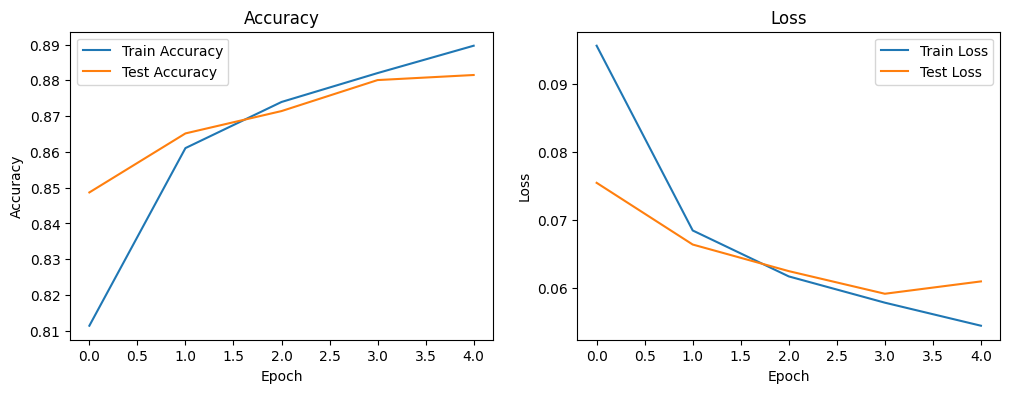

In [5]:
Experiment(epoch_amount=5)

<Sequential name=sequential_1, built=True>
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7305 - loss: 0.1376 - val_accuracy: 0.8547 - val_loss: 0.0731
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8597 - loss: 0.0713 - val_accuracy: 0.8522 - val_loss: 0.0713
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8754 - loss: 0.0624 - val_accuracy: 0.8712 - val_loss: 0.0627
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8847 - loss: 0.0576 - val_accuracy: 0.8732 - val_loss: 0.0618
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8880 - loss: 0.0556 - val_accuracy: 0.8739 - val_loss: 0.0624
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8953 - loss: 0.0520 - val_accuracy: 0.8816 - val_loss: 0.0591
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8940 - loss: 0.0510 - val_accuracy: 0.8813 - val_loss: 0.0597
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2m

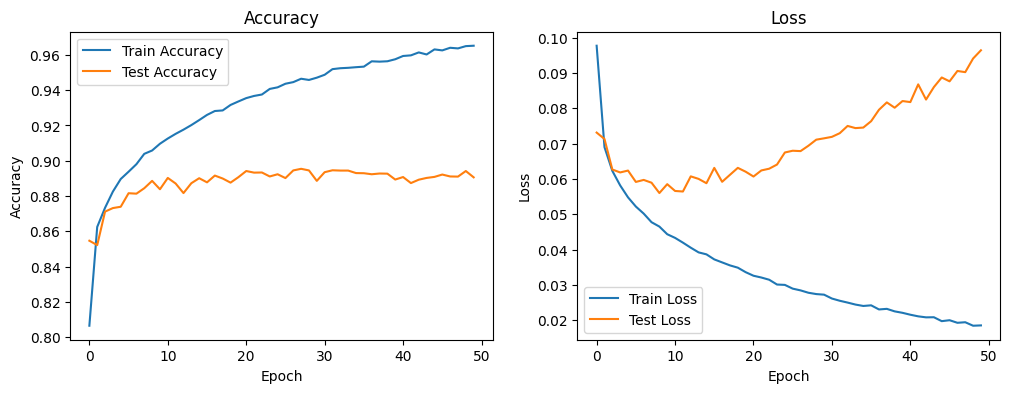

In [6]:
Experiment(epoch_amount=50)

# Эксперимент 2

<Sequential name=sequential_2, built=True>
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7587 - loss: 0.1185 - val_accuracy: 0.8537 - val_loss: 0.0717
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8547 - loss: 0.0719 - val_accuracy: 0.8655 - val_loss: 0.0682
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8673 - loss: 0.0647 - val_accuracy: 0.8517 - val_loss: 0.0730
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8725 - loss: 0.0621 - val_accuracy: 0.8673 - val_loss: 0.0664
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8804 - loss: 0.0595 - val_accuracy: 0.8670 - val_loss: 0.0664
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8813 - loss: 0.0585 - val_accuracy: 0.8755 - val_loss: 0.0630
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8880 - loss: 0.0563 - val_accuracy: 0.8768 - val_loss: 0.0634
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2m

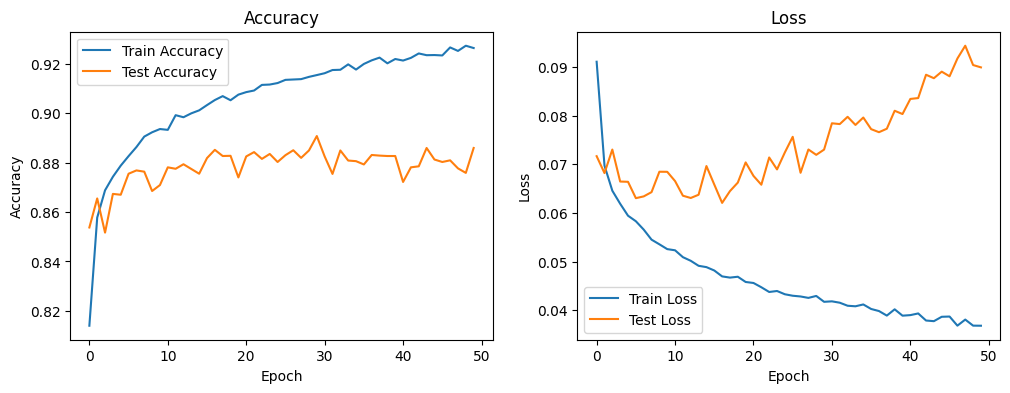

In [7]:
Experiment(learning_rate=0.005, epoch_amount=50)

<Sequential name=sequential_3, built=True>
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0980 - loss: 36.0808 - val_accuracy: 0.0957 - val_loss: 0.3332
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1038 - loss: 0.3337 - val_accuracy: 0.1003 - val_loss: 0.3333
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1023 - loss: 0.3340 - val_accuracy: 0.1030 - val_loss: 0.3315
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0966 - loss: 0.3332 - val_accuracy: 0.1003 - val_loss: 0.3439
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1002 - loss: 0.3337 - val_accuracy: 0.1027 - val_loss: 0.3312
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1000 - loss: 0.3343 - val_accuracy: 0.1003 - val_loss: 0.3317
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1013 - loss: 0.3336 - val_accuracy: 0.1003 - val_loss: 0.3333
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2

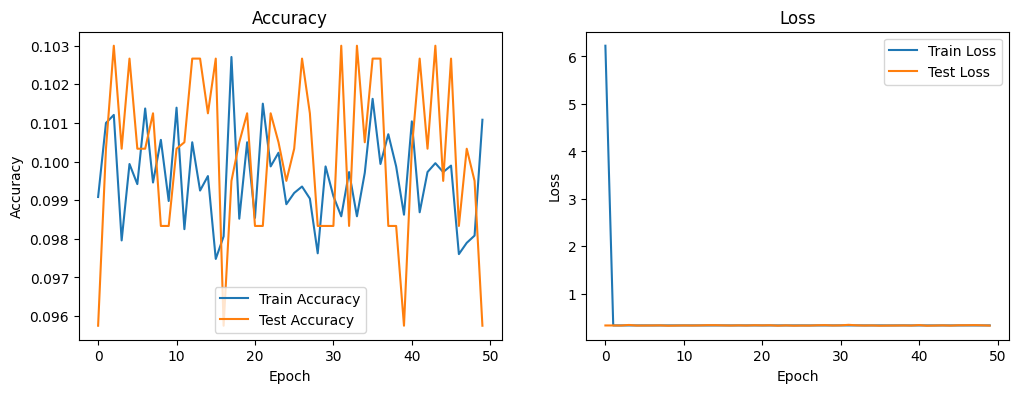

In [8]:
Experiment(learning_rate=0.8, epoch_amount=50)

# Эксперимент 3

<Sequential name=sequential_7, built=True>
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7032 - loss: 0.1503 - val_accuracy: 0.8482 - val_loss: 0.0750
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8445 - loss: 0.0757 - val_accuracy: 0.8671 - val_loss: 0.0667
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8627 - loss: 0.0679 - val_accuracy: 0.8684 - val_loss: 0.0646
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8704 - loss: 0.0636 - val_accuracy: 0.8717 - val_loss: 0.0641
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8756 - loss: 0.0622 - val_accuracy: 0.8761 - val_loss: 0.0599
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8821 - loss: 0.0583 - val_accuracy: 0.8745 - val_loss: 0.0619
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8799 - loss: 0.0583 - val_accuracy: 0.8825 - val_loss: 0.0578
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2m

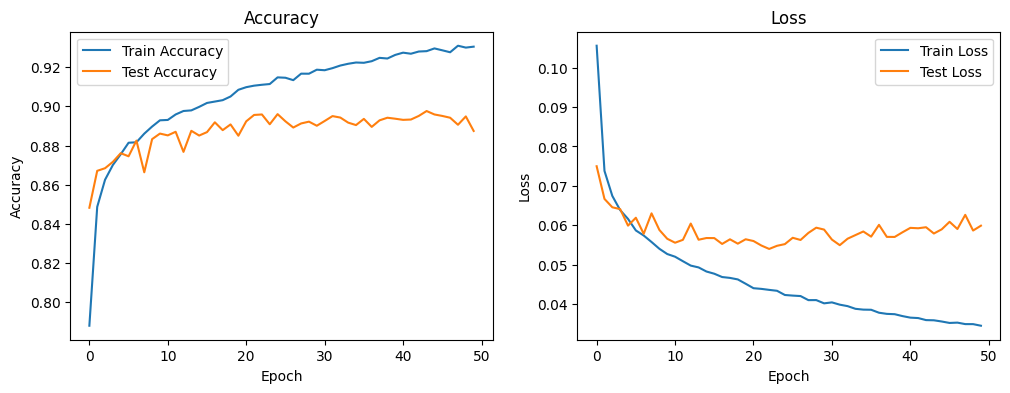

In [14]:
Experiment(epoch_amount=50, extra_layer=1, prob=0.2)

prob = 0.1

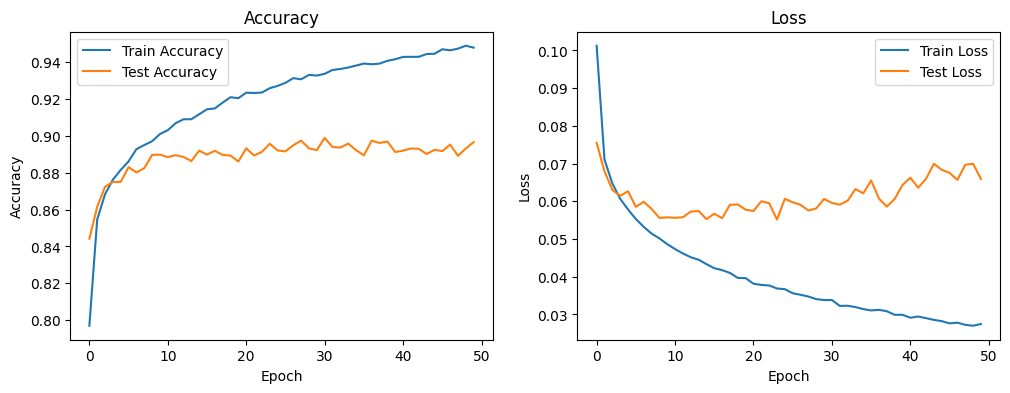

без доп слоя

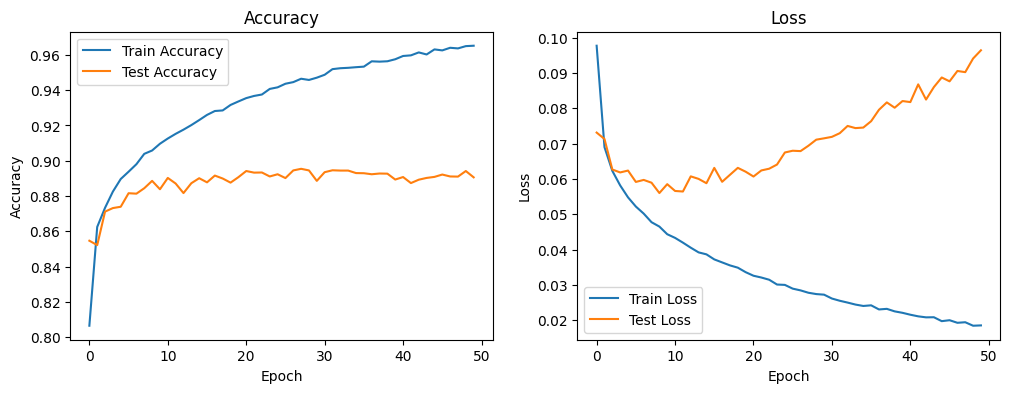

# Эксперимент 4

<Sequential name=sequential_5, built=True>
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7757 - loss: 0.1270 - val_accuracy: 0.8438 - val_loss: 0.0764
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8519 - loss: 0.0734 - val_accuracy: 0.8259 - val_loss: 0.0862
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8676 - loss: 0.0661 - val_accuracy: 0.8639 - val_loss: 0.0660
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8750 - loss: 0.0621 - val_accuracy: 0.8668 - val_loss: 0.0653
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8818 - loss: 0.0594 - val_accuracy: 0.8746 - val_loss: 0.0618
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8846 - loss: 0.0575 - val_accuracy: 0.8752 - val_loss: 0.0619
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8890 - loss: 0.0550 - val_accuracy: 0.8721 - val_loss: 0.0642
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2m

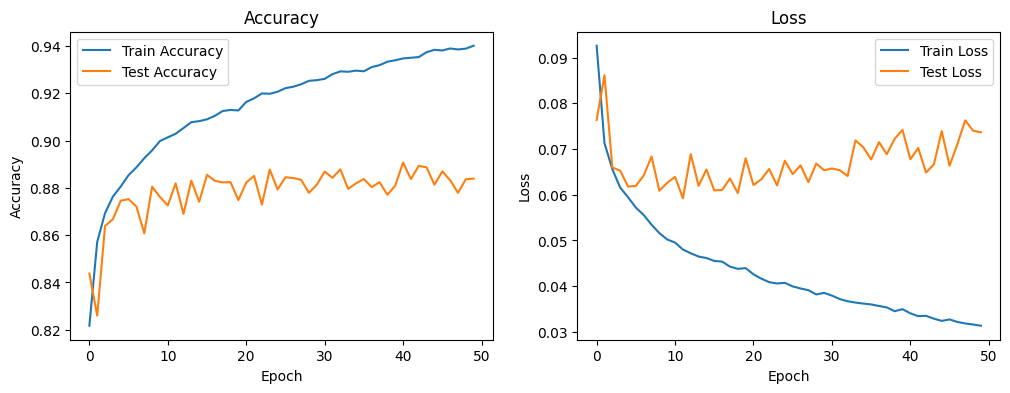

In [10]:
Experiment(epoch_amount=50, extra_layer=2)

без доп слоя

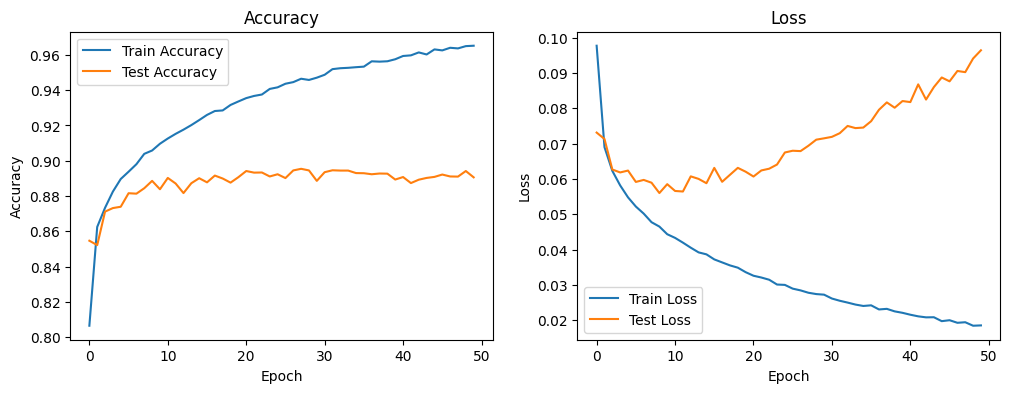